**<center>Cinematica Inversa<center>**
<br><br>

In [1]:
# ********************************************************************
#                 I M P O R T A R - L I B R E R I A S
# ********************************************************************
import numpy as np
import pandas as pd
import random
import itertools
from bitstring import BitArray
from tqdm import tqdm

import os
import shutil
from pathlib import Path

In [2]:
# >> Ruta del proyecto
module_path = os.path.abspath(os.getcwd())

In [3]:
# >> Imprimir en consola
#
#
def prRed(skk): return("\033[91m {}\033[00m" .format(skk))

def prGreen(skk): return("\033[1;92m {}\033[00m" .format(skk))
 
def prYellow(skk): return("\033[93m {}\033[00m" .format(skk))
 
def prLightPurple(skk): return("\033[1;94m {}\033[00m" .format(skk))
 
def prPurple(skk): return("\033[1;95m {}\033[00m" .format(skk))
 
def prCyan(skk): return("\033[96m {}\033[00m" .format(skk))
 
def prLightGray(skk): return("\033[97m {}\033[00m" .format(skk))
 
def prBlack(skk): return("\033[1;98m {}\033[00m" .format(skk))

In [4]:
# >> Creamos una clase para escritura y le lectura de archivos
#
# Version 2.1
class Files():
    def __init__(self, parent = None):
        self.parent = parent
    # Version 1.2
    def is_file_in_use(self, file_path):
        path = Path(file_path)
        if not path.exists():
            return False
        try:
            path.rename(path)
        except PermissionError:
            return True
        else:
            return False
    # Version 1.2
    def write_file(self, file_path, data=[], type_mode="w"):
        __run = True
        while __run:
            __status = False
            if os.path.isfile(file_path):
                __status = self.is_file_in_use(file_path=file_path)
            if not __status:
                try:
                    __file_input = open(file_path, type_mode, encoding="utf-8", errors="replace")
                    for __value in data:
                        __value = str(__value).replace("\n", "")
                        __file_input.write(str(__value) + "\n")
                    __file_input.close()
                    __run = False
                    break
                except:
                    print("Error...")
    # Version 1
    def readSingleLineFile(self, __filepath):
        __sline = ""
        __file = open(__filepath, "r", encoding="utf-8", errors="replace")
        __content = __file.readlines()
        __file.close()
        for __line in __content:
            if __line.find("#") != -1:
                pass
            else:
                if (__line == "") or (__line == "\n"):
                    pass
                else:
                    __sline = __line.replace("\n", "")
        return __sline
    # Version 1
    def readFile(self, filepath):
        __content = []
        __fullpath = os.path.abspath(str(filepath))
        if os.path.isfile(__fullpath):
            __ofile = open(__fullpath, "r", encoding="utf-8", errors="replace")
            __content = __ofile.readlines()
            __ofile.close()
        return __content
    # Version 1.2
    def write_file_string(self, file_path, data_string, type_mode="w"):
        __run = True
        while __run:
            __status = False
            if os.path.isfile(file_path):
                __status = self.is_file_in_use(file_path=file_path)
            if not __status:
                try:
                    __file_input = open(file_path, type_mode, encoding="utf-8", errors="replace")
                    __file_input.write(data_string)
                    __file_input.close()
                    __run = False
                except:
                    pass
            # time.sleep(3)

In [5]:
# >> Instanciar la clase Files()
files = Files()

In [6]:
# >> Crear carpetas para guardar resultados
output_path =os.path.join(module_path, "output")
coodinate_population_folder = os.path.join(output_path, "Coordinates_population")
fitness_folder = os.path.join(output_path, "Fitness")
def restart_folders():
    if not os.path.isdir(output_path):
        os.mkdir(output_path
        )
    else:
        for folder in os.listdir(output_path):
            shutil.rmtree(os.path.join(output_path, folder))

    if not os.path.isdir(coodinate_population_folder):
        os.mkdir(coodinate_population_folder)

    if not os.path.isdir(fitness_folder):
        os.mkdir(fitness_folder)
restart_folders()
fitness_file = os.path.join(fitness_folder, "Fistness.txt")
best_angles_file = os.path.join(fitness_folder, "Angles.txt")
log_path = os.path.join(fitness_folder, "log.txt")

*****

**<center><span style="color:blue">Denavit Hartemberg</span></center></br></br>**
**<center>Sistema de coordenadas del robot 6GDL</center>**<br><br>
*****
<center>
<div>
<img src="./Images/Sistema de coordenadas - Robot.png" width="600">
</div>
​<center>


**<span style="color:blue">Nata:</span>**<br>
- <span style="color:gray">Unidades en mm</span><br>
- **Comenzaremos el trabajo desde la descripción de Denavit-Hartenberg para el robot con 6GDL.**

**<center>Tabla de Denavit-Hartemberg</center>**

<center>   

| link | $\bm{\theta_{i-1}}$ | $\bm{d_{i-1}}$ | $\bm{\alpha_{i-1}}$ | $\bm{a_{i-1}}$| 
| ---: | ---: | ---: | ---: | ---: |
|  1  |  0  | 505 | 150 | -90 |
|  2  |  90 |   0 |-760 |  0  |
|  3  |  0  |   0 |-200 |  90 |
|  4  |  0  |1082 |   0 | -90 |
|  5  |  0  |   0 |   0 |  90 |
|  6  |  0  | 100 |   0 |  0  |
|  7  |  0  |   0 | -89 |  0  |

</center>
<!-- </div> -->

****************************

# **<center><span style="color:blue">Algoritmo Genético</span></center>**<br>

**<center>Función Objectivo<br><br>**
$\bm{z: min \sqrt{\sum_{i=1}^{3} \left[P_{final_{1x3}} - P_{i_{1x3}}\right]^2}}$<br><br>
**Restricciones:**

$\bm{-180 \leq \theta_1 \geq 180}$<br>
$\bm{-105 \leq \theta_2 \geq 155}$<br>
$\bm{-86 \leq \theta_3 \geq 160}$<br>
$\bm{-150 \leq \theta_3 \geq 150}$<br>
$\bm{-135 \leq \theta_3 \geq 90}$<br>
$\bm{-210 \leq \theta_3 \geq 210}$


</center>


<center><span style="color:black">La función objetivo tiene una estructura particular del problema, donde el error es la distancia euclidiana entre 
dos puntos, el punto de la configuración inicial y el punto final, cuando la distancia se reduce, el error tiende a 
cero</span></center>


****
**<center><span style="color:blue">Parámetros del Algoritmo Genético</span></center>**<br>
****

In [7]:
#########################################################################################################################################
#########################################################################################################################################
################################## >> P A R A M E T R O S - D E L - A L G O R I T M O << ################################################
#########################################################################################################################################
#########################################################################################################################################
# >> Posicion final del robot
final_position = [1253.129, -1797.005, 929.652]
# >> Numero de epocas
epochs = 100
# >> Tamaño de la poblacion
population_size = 2000
# >> Porcentaje de seleccion
selection_percentage = 40
# >> Cruzamiento
cross = 3
# >> Porcentaje de mutacion
mutation_percenatge = 40
# >> Restricciones de los angulos de las articulaciones
theta_limit = {"1": [-180, 180], "2": [-105, 155], "3": [-86, 160], "4": [-150, 150], "5": [-135, 90], "6": [-210, 210]}
# >> Error máximo permisible
error = 1E-3
# >> Elitistas
elitist = 2

****************************

In [8]:
# Generar angulo de forma aleatoria
#
gen_angle = lambda init_, end_: round(np.random.uniform(init_, end_), 6)
ind_bin = lambda x: BitArray(float=x, length=64)

In [9]:
# Definimos una función para construir las matrices de transformación
# en forma simbóĺica a partir de los parámetros D-H

# Version 1.0
def MatrixfromDH(theta, d, a, alpha):
    # theta y alpha en radianes
    # d y a en metros
    Rz = np.array([[np.cos(theta), -np.sin(theta), 0, 0],
                   [np.sin(theta), np.cos(theta), 0, 0],
                   [0, 0, 1, 0],
                   [0, 0, 0, 1]])
    tz = np.array([[1, 0, 0, 0],
                   [0, 1, 0, 0],
                   [0, 0, 1, d],
                   [0, 0, 0, 1]])
    ta = np.array([[1, 0, 0, a],
                   [0, 1, 0, 0],
                   [0, 0, 1, 0],
                   [0, 0, 0, 1]])
    Rx = np.array([[1, 0, 0, 0],
                   [0, np.cos(alpha), -np.sin(alpha), 0],
                   [0, np.sin(alpha), np.cos(alpha), 0],
                   [0, 0, 0, 1]])
    return Rz@tz@ta@Rx

In [10]:
# DENAVIT-HARTEMBERG
#
# Version 1.0
def DH(q1: float, q2: float, q3: float, q4: float, q5: float, q6: float):
    # >> Matrices de tranformacion por cada eslabon
    join1 = MatrixfromDH(q1, 505, 150, -np.pi/2)
    join2 = MatrixfromDH(np.pi/2 + q2, 0, -760, 0)
    join3 = MatrixfromDH(-q3, 0, -200, np.pi/2)
    join4 = MatrixfromDH(-q4, 1082, 0, -np.pi/2)
    join5 = MatrixfromDH(-q5, 0, 0, np.pi/2)
    join6 = MatrixfromDH(-q6, 100, 0, 0)
    # >> Pistola de Soldadura
    join7 = MatrixfromDH(0, 340, -89, 0)
    Ti = join1 @ join2 @ join3 @ join4 @ join5 @ join6 @ join7
    return Ti


In [11]:
# >> POPULATION
# Version 1.3
def population(size: int, theta_limit: dict, n=64):
    # print("new population")
    files.write_file(file_path=log_path, data=["Population..."], type_mode="a")
    population_ = []
    for ind_ in range(size):
        # >> Se generan los valores de theta (angulos de las articulaciones del Robot).
        individual = list(map(lambda x: gen_angle(x[0], x[1]), theta_limit.values()))
        # >> Se convierten los angulos en bytes.
        ind_to_binary = ''.join(list(map(lambda x: ind_bin(x).bin, individual)))
        # >> Se valida de que no se repita el individuo
        if not ind_to_binary in population_:
            # >> Se agrega al nuevo individuo
            chunks = [ind_to_binary[i: i + n] for i in range(0, len(ind_to_binary), n)]
            population_.append(chunks)
    return population_
    


*****
**<center>El método para seleccionar a los mejores individuos de la poblacion actual se aplica ardenando los datos mediante el valor obtenido de la función objectivo, despues se acota la población con base al porcentaje de selcción asignado.</center>**<br><br>
*****
<center>
<div>
<img src="./Images/Seleccion.png" width="600">
</div>
​<center>

In [12]:
# >> SELECTION
#
# Version 1.6
def Selection_(current_epoch: int, population: list, percentage: int, final_position: list, qts = ["q1", "q2", "q3", "q4", "q5", "q6"], n = 64):
    files.write_file(file_path=log_path, data=["Selection..."], type_mode="a")
    files.write_file(file_path=log_path, data=["********************************************", "********************************************", "********************************************"], type_mode="a")
    # >> Varaible para guardar a los mejores individuos
    fitness = {}
    for index, ind_ in enumerate(population):
        # >> Transforman los bytes a un valor de angulo
        _angles_ = list(map(lambda x: np.round(BitArray(bin=x).float * (np.pi/180), 6), ind_))
        # >> Evaluar los valores del individuo        
        tab_dh = DH(**dict(zip(qts, _angles_)))
        # >> Obtener la funcion objectivo
        coordinates = np.round(np.array(tab_dh[:3,3]).astype(np.float64).flatten(), 6)
        
        # >> Distancia ecuclideana entre el individuo y la posicion final
        dist = np.round(np.linalg.norm(final_position - coordinates), 6)
        # Insertar DE en la variables
        fitness[dist] = {"dist": dist, "angles": _angles_, "individual": ind_, "coordinates": coordinates}
        
        files.write_file(file_path=log_path, data=[str(dist) + " | " + str(ind_) +  " | " + str(_angles_) + " | " + str(coordinates)], type_mode="a")
    # Se ordenan los valores del mejor al peor indiviuo
    fitness = dict(sorted(fitness.items(), key=lambda item: item[0]))
    # Se selecciona el porcentaje de los mejores individuos de la poblacion.
    fitness_selected = dict(itertools.islice(fitness.items(), int((len(fitness)*percentage)/100)))
    return fitness_selected

*****
**<center>Seleccionar individuos mediante el método de la ruleta</center>**<br><br>
*****
<center>

<span style="color:black">Los individuos son seleccionados proporcionalmente a la función objetivo y cada individuo tiene una 
probabilidad de ser seleccionado como el individuo a reproducirse, esto se muestra en la siguiente expresión:</span>


<div>
<img src="./Images/Ruleta.png" width="600">
</div>
​<center>
Eecuación para seleccionar al individuo mediante el método de la ruleta.<br>

$\bm{L_p = \sum_{i = 0}^{n}\frac{W - \sum_{j = 1}^{m}p_j}{n - i} * 2}$

Donde:<br>

$W$ = 100 (porcentaje)<br>
$p$ = Las propabilidades acumuladas por los individuos<br>
$n$ = Tamaño de la población


*****
**<center>Método para aplicar crossover</center>**<br><br>
*****
<span style="color:black">El operador de cruzamiento se aplica a partir de dos individuos seleccionados con el método de la ruleta, algunas 
de las cadenas se cruzan con otras de forma aleatoria, de tal manera que la cadena resultante ya no sería representante de la cadena 
original, de manera gráfica se puede ver de la siguiente manera.</span>

<center>
<div>
<img src="./Images/Crossover.png" width="600">
</div>
​<center>


In [13]:
# >> CROSSOVER
# >> Realizamos el cruzamiento mediante el metodo de la ruleta
# Version 3.2
def crossover_(current_epoch: int, selection_: dict, population_size: int, cross: int, theta_limit: dict, elitist: int, n = 64):
    files.write_file(file_path=log_path, data=["Crossover..."], type_mode="a")
    _new_population = []
    _coodinates = []
    current_percentage = 100
    # >> Seleccionamos a los elitistas
    for index, (father, items_) in enumerate(selection_.items()):
        if index <= elitist:
            if not items_["individual"] in _new_population:
                _new_population.append(items_["individual"].copy())
                files.write_file(file_path=log_path, data=[_new_population[index]], type_mode="a")
            continue
        break
    # >> Generamos la nueva poblacion
    roulette = []
    a = 2
    for num, (x, y) in enumerate(selection_.items()):
        percent = int((current_percentage / ((len(selection_) - num) + 1)) * a)
        current_percentage -= percent
        roulette.extend([x]*percent)
    roulette = np.array(roulette)
    # >> Cruzamiento
    run_ = True
    c = 0
    while run_:
        current_selection = np.random.choice(roulette)
        first_ind, second_ind = selection_[current_selection]['individual'], selection_[np.random.choice(roulette[roulette!=current_selection])]['individual']
        indices = random.sample(range(len(first_ind)), cross)
        for ind in indices:
            first_ind[ind] = second_ind[ind]
        if not first_ind in _new_population:
            _new_population.append(first_ind)
            c = 0
        else:
            c += 1
        if c == 100:
            # >> No se logros realizar mas cruzamiento entre los individuos
            run_ = False
    # En caso de que  el tamaño de la nueva poblacion no este completa
    # aplicamos el siguiente método que consiste en recorrer individuo por individuo y
    # aplicar cruzamiento
    if len(_new_population) < population_size:
        for index, (father, items_) in enumerate(selection_.items()):
            _coodinates.append(items_['coordinates'].tolist())
            for child in selection_.keys():
                if father != child:
                    first_ind, second_ind = selection_[father], selection_[child]
                    f_individual, c_individual = first_ind["individual"].copy(), second_ind["individual"].copy()
                    if cross == 3:
                        indice = random.sample(range(4), 1)[0]
                        for i in range(indice, indice + 3):
                            f_individual[i] = c_individual[i]
                        if not f_individual in _new_population:
                            _new_population.append(f_individual)
                    else:
                        new_individual = first_ind["individual"].copy()[:cross]
                        new_individual.extend(second_ind["individual"].copy()[cross:])
                        if not new_individual in _new_population:
                            _new_population.append(new_individual)
                    if len(_new_population) >= population_size:
                        break
            if len(_new_population) >= population_size:
                    break
    # Por ultimo, verficamos si el tamaño de la poblacion sigue siendo menor, se agrega
    # nuevos inidividuos de fomra aleatoria.
    if len(_new_population) < population_size:
        _population_ = population(size=int(population_size - len(_new_population)), theta_limit=theta_limit)
        for index, individual in enumerate(_population_):
            _new_population.append(individual)
    # files.write_file(file_path=log_path, data=["Selected..."], type_mode="a")  
    # files.write_file(file_path=log_path, data=_new_population, type_mode="a")
    files.write_file(file_path=log_path, data=["********************************************"], type_mode="a")
    for i in range(elitist):
        files.write_file(file_path=log_path, data=[_new_population[i]], type_mode="a")
    
    return _new_population


*****
**<center>Método para aplicar Mutación</center>**<br><br>
*****
<center>

<span style="color:black">

La mutación, es un operador que se aplica con probabilidad $p_m$, es decir todos tiene la misma probabilidad de ser elegido a excepción de los elitistas, y que tiene el efecto de invertir un bit utilizando 
una probabilidad de mutación del bit $l_{-1}$, siendo $l$ la longitud de la cadena del cromosoma, en la siguiente figura se muestra un ejemplo sobre mutación.</span>

 </center><br>

<center>
<div>
<img src="./Images/Mutacion.png" width="600">
</div>
​<center>

In [14]:
# >> MUTATIONS
#
# Version 2.5
def mutations_(population: list, percentage: int, theta_limit: dict, elitist: int):
    files.write_file(file_path=log_path, data=["Mutation..."], type_mode="a")
    # >> Obtenemos el tamaño de los individuos que seran mutados con base al parametro de porcentaje.
    size_ = int((percentage*len(population))/100)
    # >> Ignoramos a los elitistas
    selected = random.sample(range(elitist, len(population)), size_)
    ##
    # >> Aplicamos mutacion
    for index_ind in selected:
        # Seleecionamos al individuo
        individual = population[index_ind]
        # Elejimos 3 genes de forma aleatoria
        random_index = random.sample(range(len(individual)), 3)
        ####
        # >> Invertimos el valor del gen.
        for index in random_index:
            gen = individual[index]
            gen = list(gen)
            random_gen = random.sample(range(len(gen)), 3)
            val = True
            c = 0
            while val:
                for i in random_gen:
                    get_gen = gen[i]
                    if get_gen == "0":
                        gen[i] = "1"
                    else:
                        gen[i] = "0"
                string_crom = ''.join(gen)
                mutated_chromosome = BitArray(bin=string_crom).float
                min_, max_ = theta_limit[str(index + 1)]
                # Validar si esta dentro de la restricciones
                #
                #
                if mutated_chromosome > min_ and mutated_chromosome < max_:
                    individual[index] = string_crom
                    val = False
                else:
                    c += 1
                if c == 50:
                    val = False
        if not individual in population:
            population[index_ind] = individual
    for i in range(elitist):
        files.write_file(file_path=log_path, data=[population[i]], type_mode="a")
    return population 


****
**<center><span style="color:blue">Ejecución del Algoritmo</span></center>**
****

In [15]:
# >> Limpiamos carpetas y archivos en caso de conter informacion.
restart_folders()
files.write_file(file_path=fitness_file, data=[])
files.write_file(file_path=best_angles_file, data=[])
files.write_file(file_path=log_path, data=[])
files.write_file(file_path=log_path, data=["Start Algorithm:"], type_mode="w")

In [16]:
# >> Generar poblacion
_population_ = population(size=population_size, theta_limit=theta_limit)
best_angles = []
fitness = []
c = 0
for epoch in tqdm(range(epochs), colour="GREEN"):
    # >> Realizamos la seleccion del 40% de la poblacion
    _selection_ = Selection_(current_epoch=epoch + 1, population=_population_, percentage=selection_percentage, final_position=final_position)
    if not _selection_:
        break
    epcs = []
    for i in _selection_.values():
        epcs.append(i['coordinates'].tolist())
    files.write_file(file_path=os.path.join(coodinate_population_folder, f"Epoch{epoch + 1}.txt"), data=epcs)
    # >> Seleccionamos al Elistista
    select_min = min(_selection_.items(), key=lambda x: x[0])
    ED_ = select_min[1]['dist']

    ANGLES_ = select_min[1]['angles']
    files.write_file(file_path=log_path, data=[select_min[1]["individual"]], type_mode="a")
    fitness.append(ED_)
    # >> Escribimos los resultado obtenidos en la epoca actua;
    files.write_file(file_path=fitness_file, data=[str(ED_)], type_mode="a")
    angles = np.round(np.array(ANGLES_) * (180 / np.pi), 6)
    angles = angles.tolist()
    files.write_file(file_path=best_angles_file, data=[str(angles)], type_mode="a")
    if (ED_ <= error) or (epoch == epochs - 1):
        best_angles.extend(ANGLES_)
        break
    # >> Crossover
    parameters = {"elitist": elitist, "selection_": _selection_.copy(), "population_size": population_size, "cross": cross, "current_epoch": epoch + 1, "theta_limit": theta_limit}
    _cross_population = crossover_(**parameters)
    if c >= 3:
        # print("Error:", ED_, epoch, len(_cross_population))
        c = 0
    if not _cross_population:
        break
    # >> Mutation
    parameters = {"elitist": elitist, "population": _cross_population.copy(), "percentage": mutation_percenatge, "theta_limit": theta_limit}
    _population_ = mutations_(**parameters)

  
    if epoch % 10 == 0:
        print(prLightPurple("Epoch:"), prBlack(str(epoch)), "|", prLightPurple("Error:"), prBlack(str(np.round(ED_, 6))), "|", prLightPurple("Size population:"), prBlack(str(len(_cross_population))))
    if epoch >= epochs - 1:
        print(prGreen("Completed:"), prLightPurple("Epoch:"), prBlack(str(epoch)), "|", prLightPurple("Error:"), prBlack(str(np.round(ED_, 3))), "|", prLightPurple("Size population:"), prBlack(str(len(_cross_population))))
print(best_angles)

  1%|          | 1/100 [00:05<09:03,  5.49s/it]

 Epoch:  0 |  Error:  257.084479 |  Size population:  2000


 11%|█         | 11/100 [00:57<07:45,  5.23s/it]

 Epoch:  10 |  Error:  0.583012 |  Size population:  2000


 21%|██        | 21/100 [02:01<08:26,  6.41s/it]

 Epoch:  20 |  Error:  0.047196 |  Size population:  2000


 31%|███       | 31/100 [03:02<07:31,  6.54s/it]

 Epoch:  30 |  Error:  0.003293 |  Size population:  2000


 41%|████      | 41/100 [04:02<05:59,  6.10s/it]

 Epoch:  40 |  Error:  0.00142 |  Size population:  2000


 51%|█████     | 51/100 [04:59<04:28,  5.48s/it]

 Epoch:  50 |  Error:  0.00142 |  Size population:  2000


 61%|██████    | 61/100 [05:52<03:25,  5.26s/it]

 Epoch:  60 |  Error:  0.00142 |  Size population:  2000


 71%|███████   | 71/100 [06:45<02:36,  5.39s/it]

 Epoch:  70 |  Error:  0.00142 |  Size population:  2000


 81%|████████  | 81/100 [07:40<01:38,  5.20s/it]

 Epoch:  80 |  Error:  0.00142 |  Size population:  2000


 91%|█████████ | 91/100 [08:38<00:52,  5.79s/it]

 Epoch:  90 |  Error:  0.00142 |  Size population:  2000


 99%|█████████▉| 99/100 [09:39<00:05,  5.86s/it]

[-1.093046, 1.566906, 1.493279, 0.740763, 1.041062, -0.0]


****
**<center><span style="color:blue">Resultados</span></center>**
****


<center>

<span style="color:black">

Los resultados obtenidos se muestran en la siguiente figura, observándose a los invidiuos de la población dirigiendose 
hacia el punto objetivo reduciéndose la distancia Euclidiana en función de error y el máximo fitness alcanzado a través de las generaciones/épocas. 
La tabla muestra el resultado del algoritmo genético en su convergencia.</span>

 </center><br>

<center>



**NOTA: Para evitar la acumulación de demasiada información sobre este notebook, las configuraciones (soluciones) y la distancia euclidiana (evaluación de la función objetivo), se guardan en archivos .txt en la carpeta Output incluida en este directorio.**

**Los ángulos se encuentran en Output->Fitness->Angles.txt**

**Por su parte, la distancia euclidiana se guarda en Output->Fitness->Fitness.txt**

**Cabe señalar que en estos archivos de texto están escritos los resultados para cada época, por lo que los resultados finales son los de la última línea.**

<center>
<p float="left">
  <img src="./Images/Epoca1.png" width="400" />
  <img src="./Images/Epoca5.png" width="400" /> 
  <img src="./Images/Epoca36.png" width="400" />
</p>
</center>

**<center>Resultados del GA en la generación de trayectoria.</center>**

<center>

$\bm{fitness = \frac{1}{e^{error_{i}}}}$ <br>

| Generación | Error | Fitness | Tiempo |
| --- | --- | --- | --- |
|  100 |  0.00142  | 0.9985 | 9min, 39seg |

</center>
<!-- </div> -->

In [17]:
import matplotlib.pyplot as plt
plt.style.use("ggplot") 

In [18]:
values_error = files.readFile(filepath="./Output/Fitness/Fistness.txt")
values_error = np.array(list(map(lambda val: float(val.replace("\n", "")), values_error)))


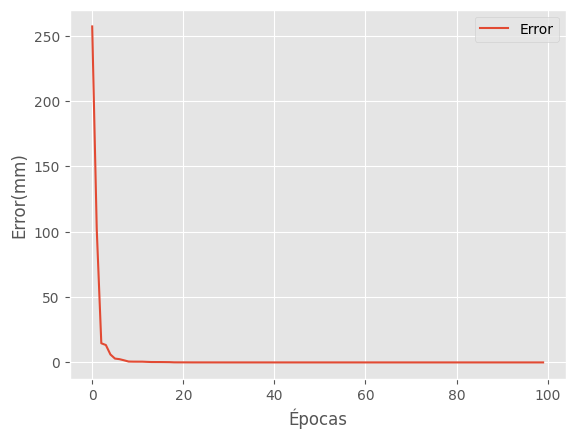

In [19]:

plt.plot(values_error[:100], label="Error")
plt.xlabel("Épocas") 
plt.ylabel("Error(mm)") 
plt.legend()
plt.show()


<center>

<span style="color:black">

Valores de los angulos de las articulaciones a través de las épocas para alcanzar la posicion deseada.

</span>

 </center><br>

<center>




In [20]:
best_angles_ = files.readFile(filepath="./Output/Fitness/Angles.txt")
best_angles_ = np.array(list(map(lambda val: val.replace("\n", ""), best_angles_)))[:100]
values_angles = {}
for values_ in best_angles_:
    values_ = ''.join(values_).replace("[", "").replace("]", "").split(",")
    for index, angle in enumerate(values_):
        _key = f"theta_{index}"
        if not _key in values_angles:
            values_angles[_key] = [np.round(float(angle), 2)]
        else:
            values_angles[_key].append(np.round(float(angle), 2))


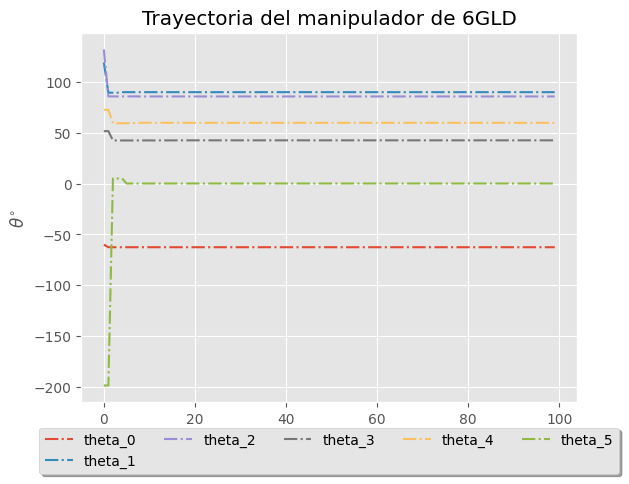

In [21]:
for key_, angles in values_angles.items():
    plt.plot(angles, label=key_, linestyle="-.", linewidth=1.5)
plt.xlabel("Épocas") 
plt.ylabel(r"$\theta^{\circ}$") 
plt.legend()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
plt.title("Trayectoria del manipulador de 6GLD")
plt.show()

Observamos que la articulación que mayor cambio de ángulo tuvo fue la 5 y luego logró estabilizarse conforme el paso de las épocas.